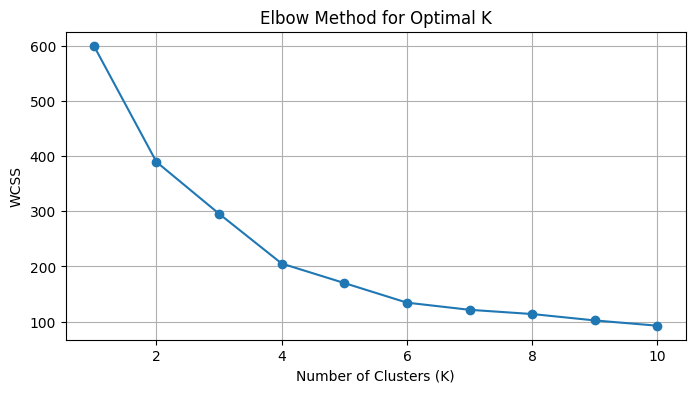

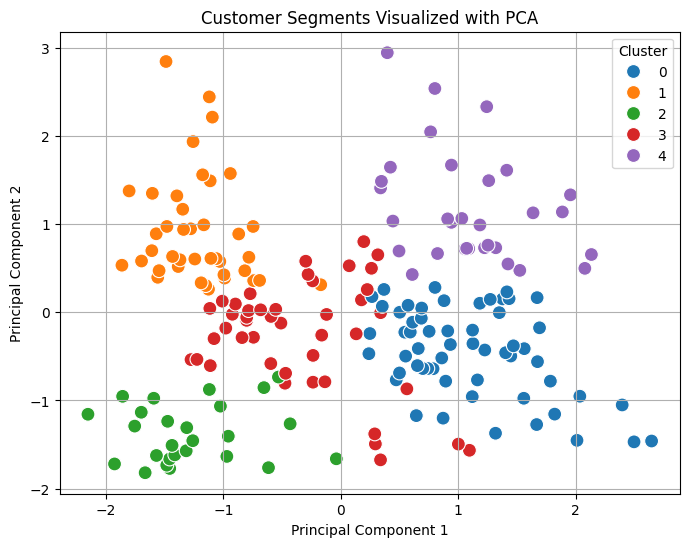

Silhouette Score: 0.40846873777345605


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# ✅ Load the dataset (Add the correct path if needed)
df = pd.read_csv("Mall_Customers.csv")

# ✅ Select relevant numerical features
features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# ✅ Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# ✅ Use Elbow Method to find optimal K
wcss = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# ✅ Plot the Elbow Curve
plt.figure(figsize=(8, 4))
plt.plot(K_range, wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

# ✅ Fit KMeans with optimal K (assume K=5 from elbow method visually)
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_features)

# ✅ Add cluster labels to original DataFrame
df['Cluster'] = cluster_labels

# ✅ PCA for 2D Visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

df['PCA1'] = pca_components[:, 0]
df['PCA2'] = pca_components[:, 1]

# ✅ Visualize clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='tab10', s=100)
plt.title('Customer Segments Visualized with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# ✅ Evaluate with Silhouette Score
silhouette_avg = silhouette_score(scaled_features, cluster_labels)
print("Silhouette Score:", silhouette_avg)